In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Data file.csv")
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [3]:
df.shape

(209593, 37)

### EDA

In [4]:
# Check for null values in data
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
# Check for duplicate data
df.duplicated().sum()

0

In [7]:
# Check for unique Values
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147026
daily_decr90            158670
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Here pcircle has only one value which is not required for analysis. 

In [8]:
# we can also drop Unnamed and msisdn, which will not affect the analysis
df.drop(columns=['Unnamed: 0', 'pcircle', 'msisdn'],inplace=True)
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [9]:
df['pdate']

0         2016-07-20
1         2016-08-10
2         2016-08-19
3         2016-06-06
4         2016-06-22
             ...    
209588    2016-06-17
209589    2016-06-12
209590    2016-07-29
209591    2016-07-25
209592    2016-07-07
Name: pdate, Length: 209593, dtype: object

In [10]:
df['pdate'] = df['pdate'].str.replace("-","").astype(int)
df['pdate']

0         20160720
1         20160810
2         20160819
3         20160606
4         20160622
            ...   
209588    20160617
209589    20160612
209590    20160729
209591    20160725
209592    20160707
Name: pdate, Length: 209593, dtype: int32

In [11]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

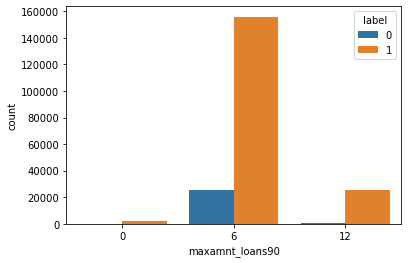

In [12]:
# Lets check the count for maximum loan amount in 90 days
sns.countplot(x='maxamnt_loans90',hue='label', data=df)

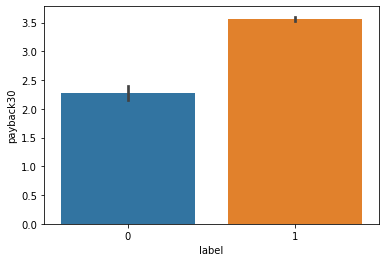

In [13]:
sns.barplot(x=df['label'],y=df['payback30'],data=df)
plt.show()

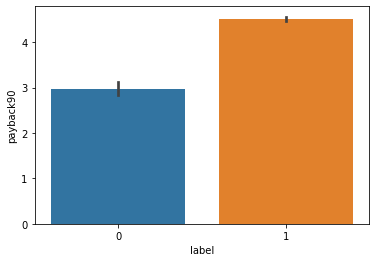

In [14]:
sns.barplot(x=df['label'],y=df['payback90'],data=df)
plt.show()

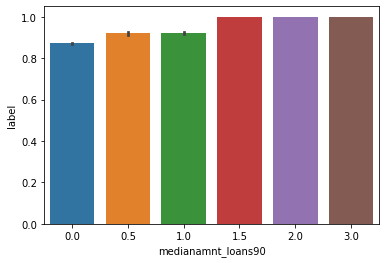

In [15]:
sns.barplot(x='medianamnt_loans90',y='label',data=df)
plt.show()

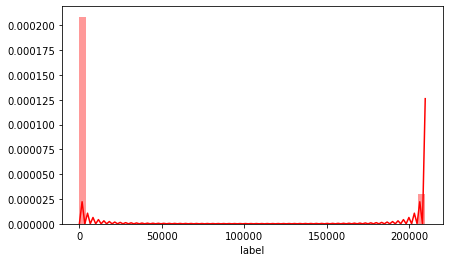

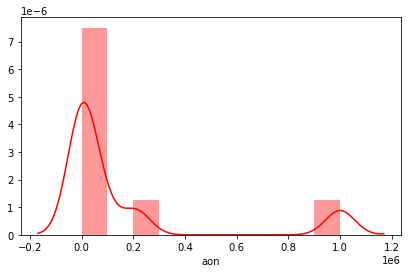

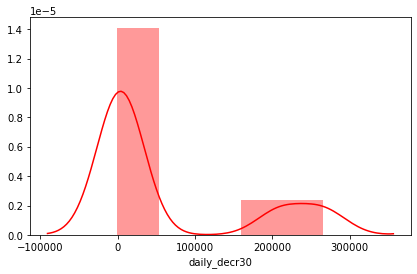

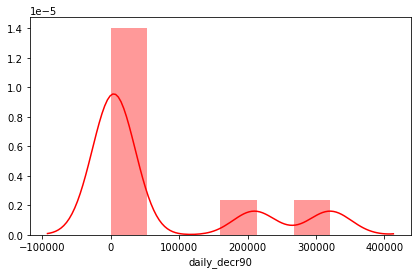

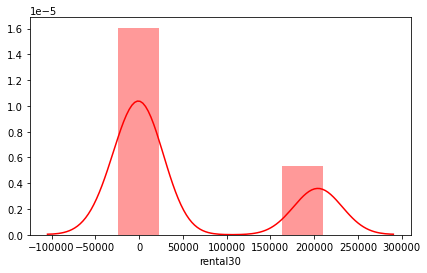

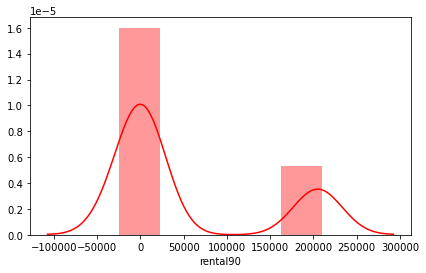

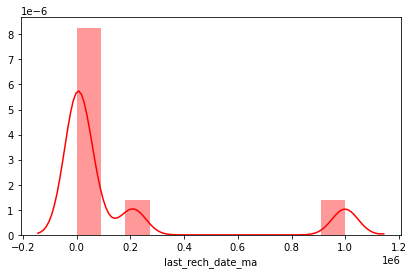

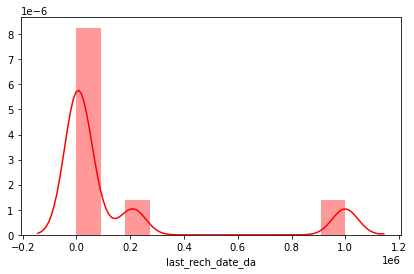

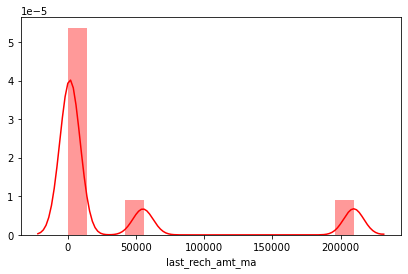

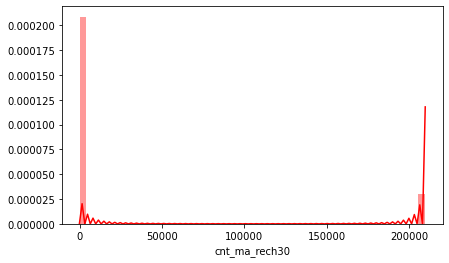

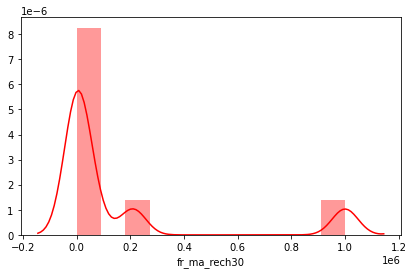

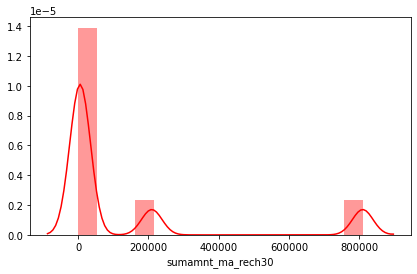

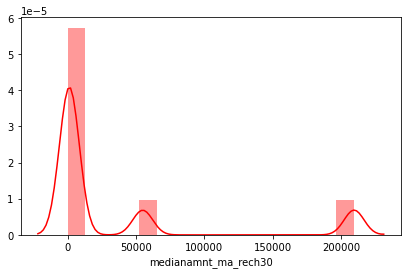

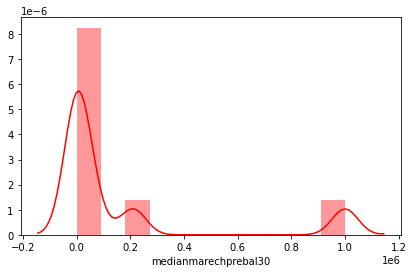

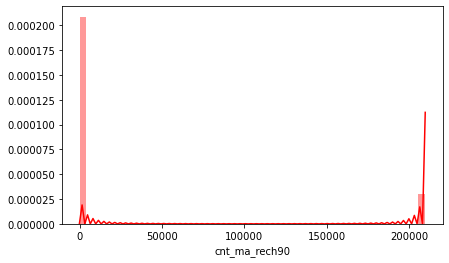

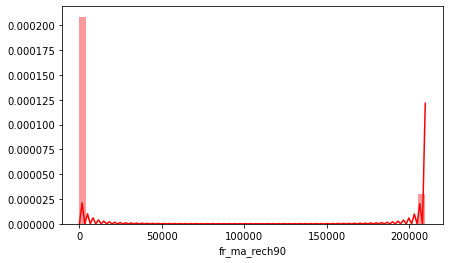

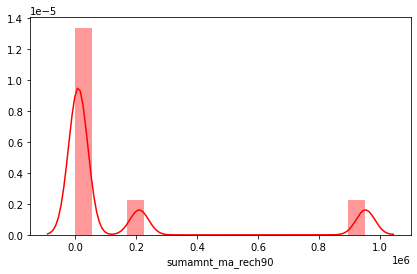

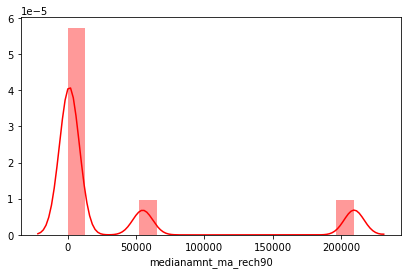

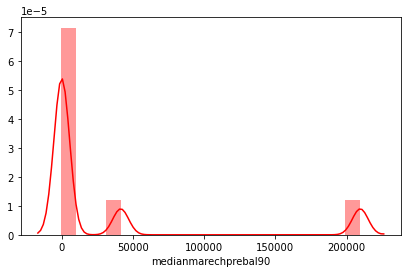

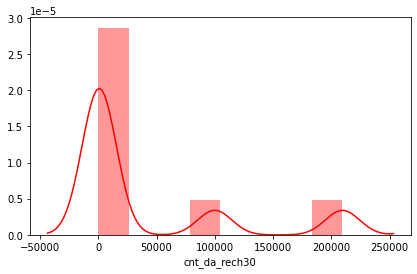

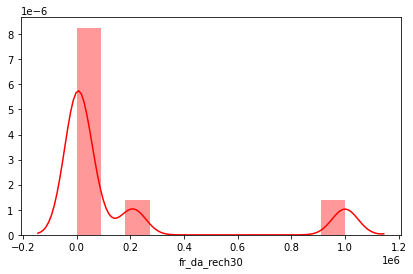

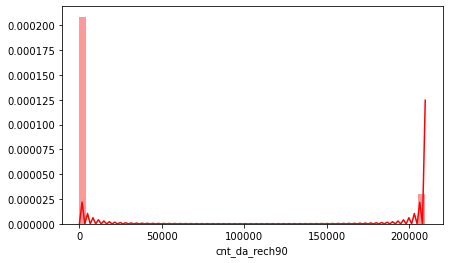

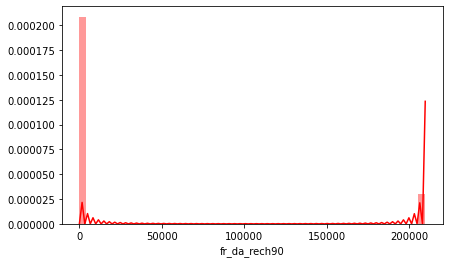

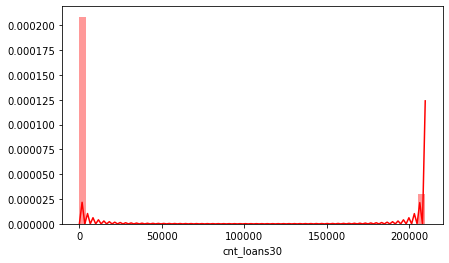

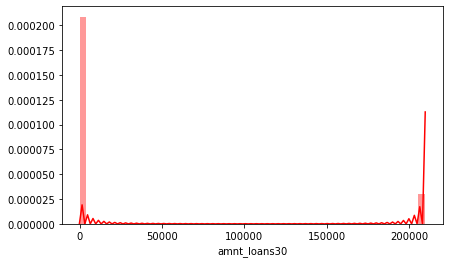

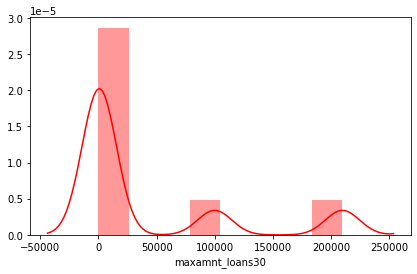

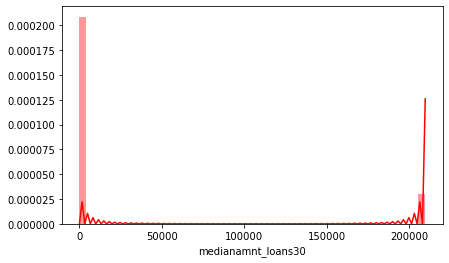

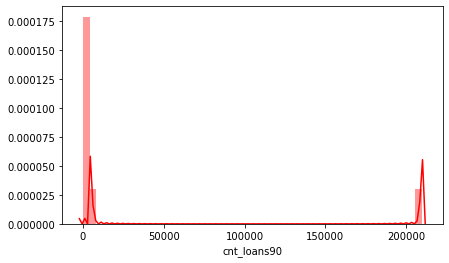

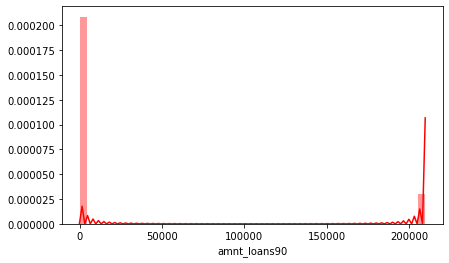

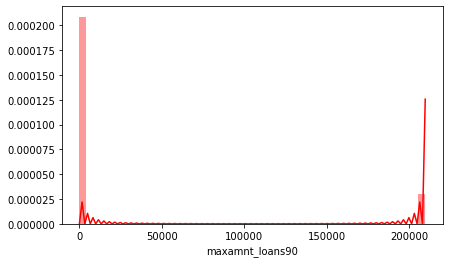

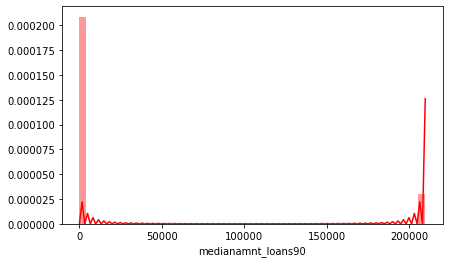

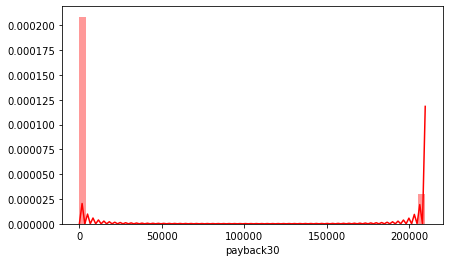

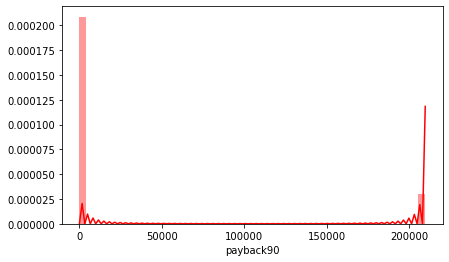

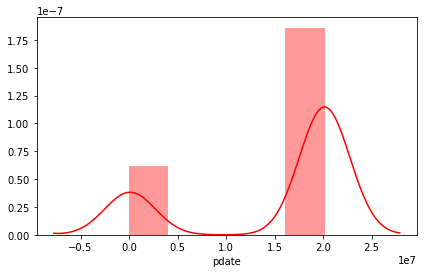

In [16]:
# Plot using distplot
for i in df.select_dtypes(include=[np.number]):
    g=plt.figure(figsize=(15,4))
    g.add_subplot(1,2,1)
    sns.distplot(df[i].describe(), color='r',kde=True,label='data')
   

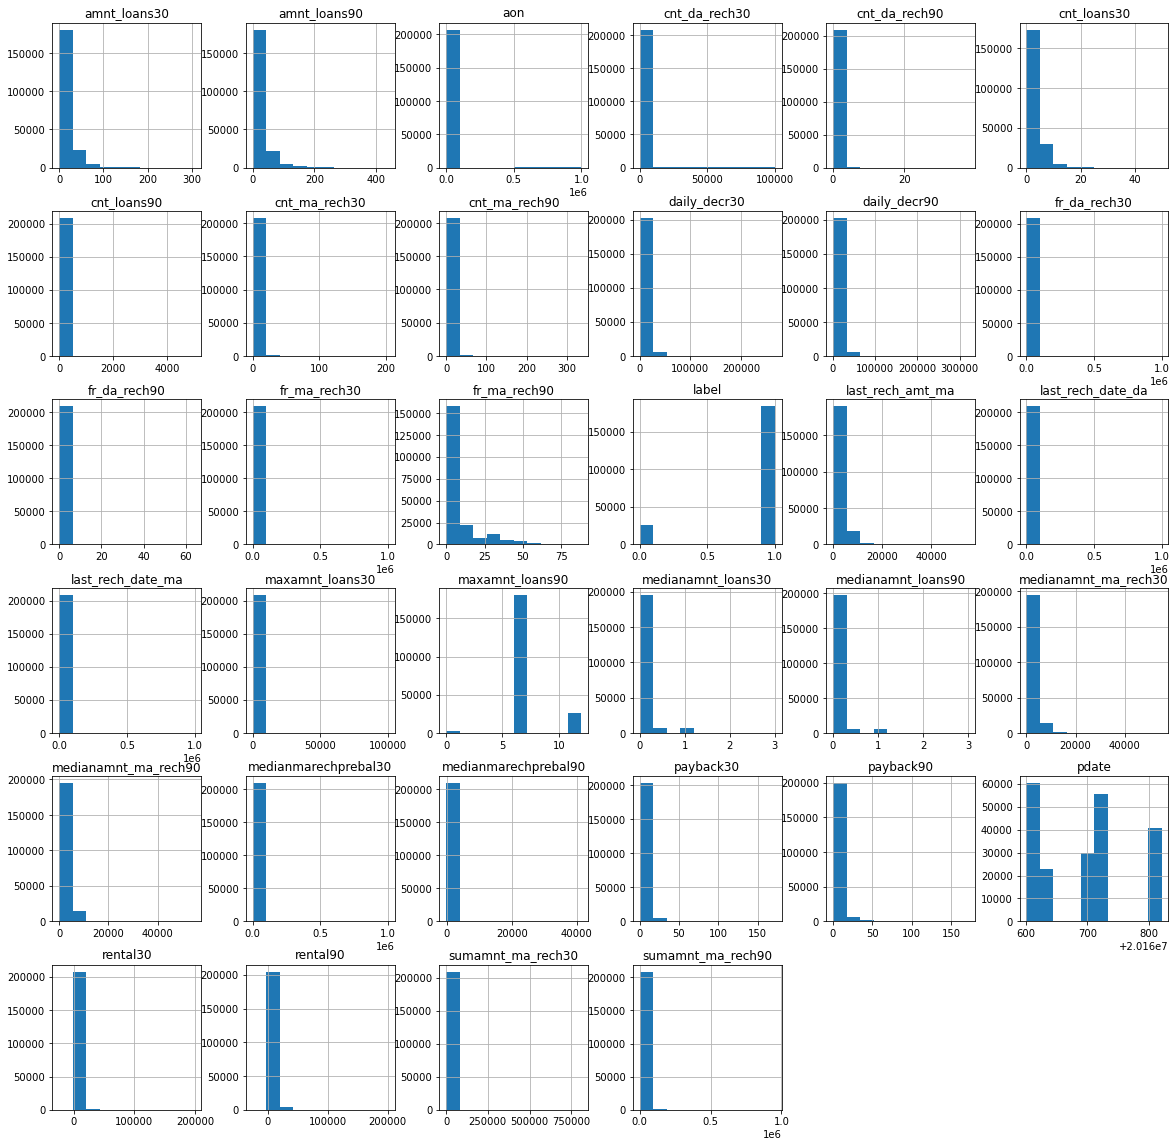

In [17]:
# Histogram
df.hist(figsize=(20, 20))
plt.show()

In [18]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,2.095930e+05
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2.016069e+07
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,7.247639e+01
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016060e+07
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2.016062e+07
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2.016071e+07
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2.016073e+07
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2.016082e+07


Here we can see huge difference between mean and 50%, max and 75% for most of the columns, this indicates extreme ouliers in the dataset.

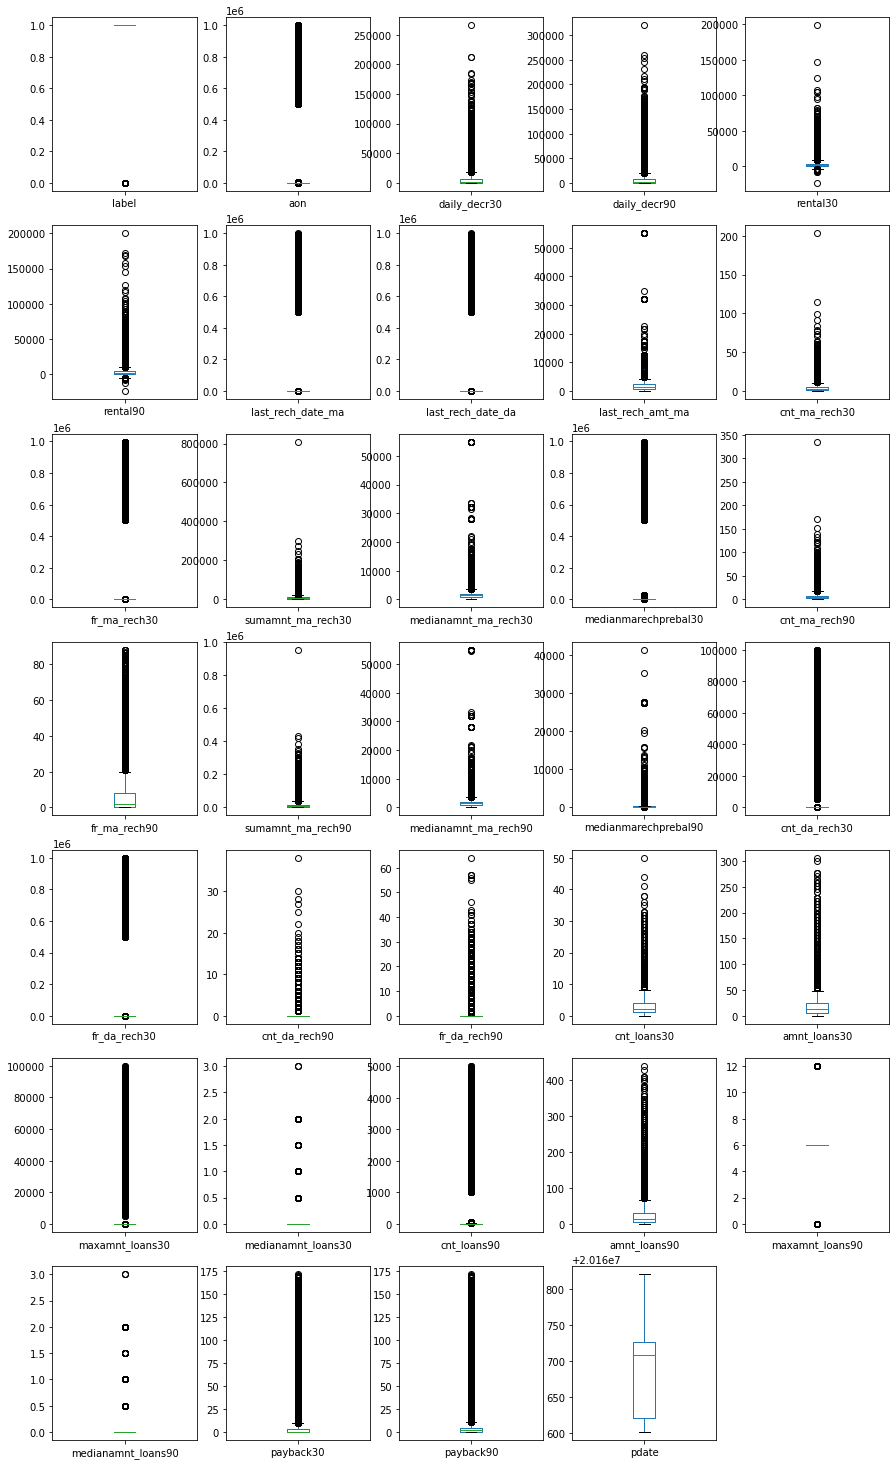

In [19]:
df.plot(kind='box',subplots=True,figsize=(15,30), layout=(8,5))
plt.show()

In [20]:
# Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df.select_dtypes(include=[np.number])))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(209593, 34)
(161465, 34)


In [21]:
df_final.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
label,1.000000,0.086376,0.191662,0.192073,0.048945,0.069545,-0.095769,0.026123,0.159589,0.292492,...,0.244307,0.002689,0.040130,0.244240,0.246878,0.088565,0.029620,0.142282,0.141053,0.143538
aon,0.086376,1.000000,0.071687,0.073848,0.052519,0.057465,0.015165,-0.000733,0.081721,0.015264,...,0.052399,0.002055,0.000348,0.082985,0.083288,0.029714,-0.004733,0.021474,0.041227,0.067303
daily_decr30,0.191662,0.071687,1.000000,0.979246,0.445846,0.495649,-0.046021,0.058444,0.257911,0.396178,...,0.420826,0.003933,0.010631,0.514988,0.570296,0.434206,-0.027961,0.148301,0.194491,0.629355
daily_decr90,0.192073,0.073848,0.979246,1.000000,0.433199,0.504950,-0.040094,0.060433,0.247432,0.373330,...,0.396451,0.003916,0.013181,0.517802,0.573994,0.436362,-0.028166,0.139665,0.190416,0.654622
rental30,0.048945,0.052519,0.445846,0.433199,1.000000,0.950336,-0.017986,0.011158,0.089045,0.237642,...,0.230621,0.004687,-0.002064,0.282042,0.310023,0.242881,-0.025504,0.147701,0.180398,0.380296
rental90,0.069545,0.057465,0.495649,0.504950,0.950336,1.000000,-0.005881,0.019024,0.090056,0.233016,...,0.229866,0.003907,0.000736,0.316953,0.349835,0.277055,-0.028455,0.150066,0.201048,0.464203
last_rech_date_ma,-0.095769,0.015165,-0.046021,-0.040094,-0.017986,-0.005881,1.000000,0.025265,0.230253,-0.246814,...,-0.194832,-0.002617,-0.004465,-0.159731,-0.156904,-0.013813,-0.000904,-0.142428,-0.091799,0.066014
last_rech_date_da,0.026123,-0.000733,0.058444,0.060433,0.011158,0.019024,0.025265,1.000000,0.020146,0.008973,...,0.007187,-0.001800,0.002904,0.012100,0.016532,0.034832,-0.000534,0.003122,0.029857,0.077771
last_rech_amt_ma,0.159589,0.081721,0.257911,0.247432,0.089045,0.090056,0.230253,0.020146,1.000000,0.021704,...,0.036532,0.003791,0.036543,0.021263,0.043217,0.154227,0.032219,-0.014801,0.011451,0.096274
cnt_ma_rech30,0.292492,0.015264,0.396178,0.373330,0.237642,0.233016,-0.246814,0.008973,0.021704,1.000000,...,0.721342,0.001250,-0.011570,0.648824,0.645464,0.142909,-0.018617,0.216494,0.170299,0.158078


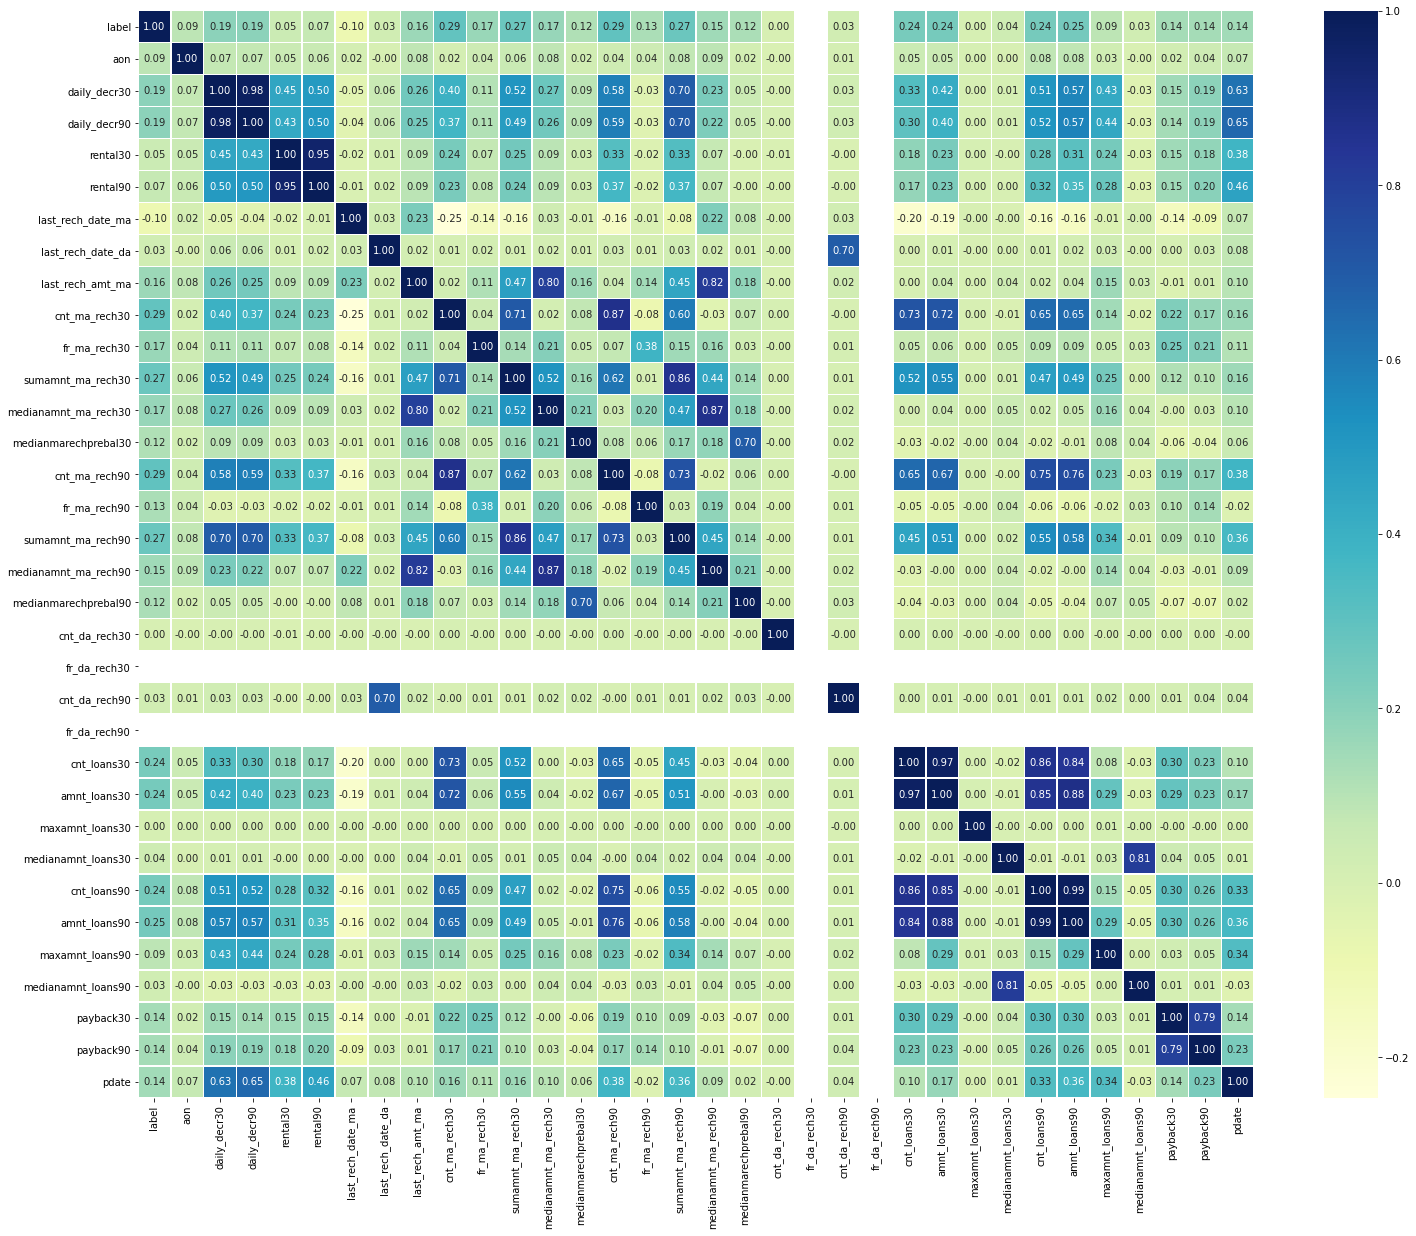

In [22]:
# Let's plot the correlation matrix
corr_matrix = df_final.corr()
fig, ax = plt.subplots(figsize=(25, 20))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

Here we can see high correlation between the features

In [23]:
# We can see that fr_da_rech30 and fr_da_rech90 doesn't have any values after outlier removal, we can drop these columns
df_final.drop(columns=['fr_da_rech30', 'fr_da_rech90'],inplace=True)
df_final.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20160720
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,20160810
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,20160819
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,20160606
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,20160622


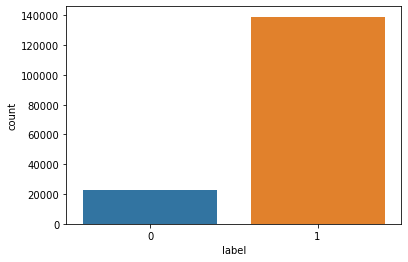

In [24]:
# countplot label
sns.countplot(df_final['label']) 

Here we can see our target is highly imbalanced

In [25]:
# Lets start modelling
# Split data into X and y
X = df_final.drop("label", axis=1)
y = df_final["label"]
X.shape, y.shape

((161465, 31), (161465,))

In [26]:
# Balancing data by SMOTE technique.
from imblearn.combine import SMOTETomek
smt = SMOTETomek(random_state=45)
X_res, y_res = smt.fit_sample(X,y)

X_res.shape, y_res.shape

((273536, 31), (273536,))

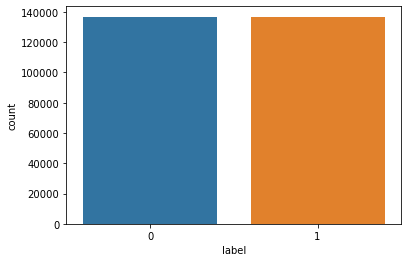

In [27]:
# Check data balance
sns.countplot(y_res)

Here we can see data is balanced

In [ ]:
# Normalise data
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_res = ss.fit_transform(X_res)

In [28]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res,
                                                    y_res,
                                                    test_size=0.25,
                                                    random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((205152, 31), (68384, 31), (205152,), (68384,))

We're going to try below machine learning models:

 1. Logistic Regression
 2. DecisionTreeClassifier
 3. K-Nearest Neighbours Classifier
 4. Random Forest Classifier
 5. XGBoost

In [32]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "DecisionTreeClassifier": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier(),
          "XGB": XGBClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'Logistic Regression': 0.7295419981282171,
 'DecisionTreeClassifier': 0.9104761347683669,
 'KNN': 0.8722361956013103,
 'Random Forest': 0.9467857978474497,
 'XGB': 0.9429837388862892}

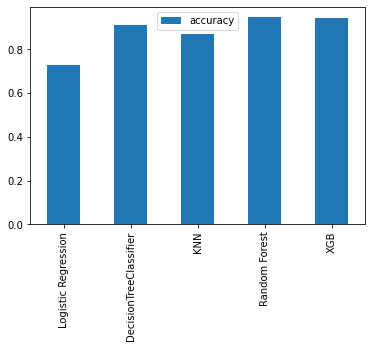

In [34]:
# Compare models
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Random forest and XGB is giving more accuracy. Lets tune the models.

In [35]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of differnt values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

Maximum KNN score on the test data: 91.67%


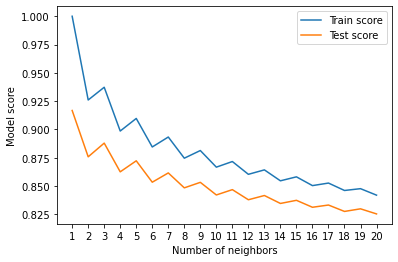

In [36]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

In [45]:
def max_acc_score(reg, x, y):
    max_acc_score=0
    for r_state in range(1,101):
        X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size=0.33)
        reg.fit(X_train, y_train)
        pred = reg.predict(X_test)
        acc_score=accuracy_score(y_test, pred)
        if acc_score > max_acc_score:
            max_acc_score = acc_score
            final_r_state = r_state
    print("The max accuracy score for", reg, "is: ", max_acc_score, " achieved at", final_r_state)
    return final_r_state

In [46]:
KNN = KNeighborsClassifier(n_neighbors=1)
max_acc_score(KNN, X_res, y_res)

The max accuracy score for KNeighborsClassifier(n_neighbors=1) is:  0.9119390253359478  achieved at 98


98

In [48]:
DTC = DecisionTreeClassifier()
max_acc_score(DTC, X_res, y_res)

The max accuracy score for DecisionTreeClassifier() is:  0.9118836341077027  achieved at 81


81

In [49]:
rf = RandomForestClassifier()
max_acc_score(rf, X_res, y_res)

The max accuracy score for RandomForestClassifier() is:  0.9473561766758616  achieved at 51


51

RandomForestClassifier is giving more accuracy, lets tune this further

In [57]:
# Lets use Adaboost to improve Randomforest accuracy
from sklearn.ensemble import AdaBoostClassifier as adb_cls
BC = adb_cls(base_estimator = rf, learning_rate=0.4)
BC.fit(X_train,y_train)
y_pred = BC.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print('accuracy:', accuracy)

accuracy: 0.944212096396818


In [75]:
from sklearn.model_selection import GridSearchCV

params = {'n_estimators':[100,500],'random_state':[10,100]}
rs_rf = GridSearchCV(rf, param_grid= params, scoring='accuracy')
rs_rf.fit(X_train, y_train)
print("Best parameters for RandomForestClassifier: ", rs_rf.best_params_)

Best parameters for RandomForestClassifier:  {'n_estimators': 500, 'random_state': 100}


In [78]:
KNN = KNeighborsClassifier(n_neighbors=1)
DT = DecisionTreeClassifier(random_state=81)
rf = RandomForestClassifier(n_estimators=500, random_state=51)
xgb = XGBClassifier()

In [95]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('Randomforest', rf))
models.append(('XGBoost', xgb))

******************* KNeighborsClassifier *******************

Accuracy_Score  =  91.67%
Cross_Val_Score  =  92.49%
roc_auc_score  =  91.64%

 Classification_report 
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     34374
           1       0.98      0.85      0.91     34010

    accuracy                           0.92     68384
   macro avg       0.92      0.92      0.92     68384
weighted avg       0.92      0.92      0.92     68384



Confusion Matrix 

 [[33693   681]
 [ 5015 28995]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



******************* DecisionTreeClassifier *******************

Accuracy_Score  =  91.12%
Cross_Val_Score  =  91.28%
roc_auc_score  =  91.12%

 Classification_report 
               precision    recall  f1-score   support

           0       0.91      0.92      0.91     34374
           1       0.92      0.90      0.91     34010

    accuracy                           0.91     68384
   macro avg       0

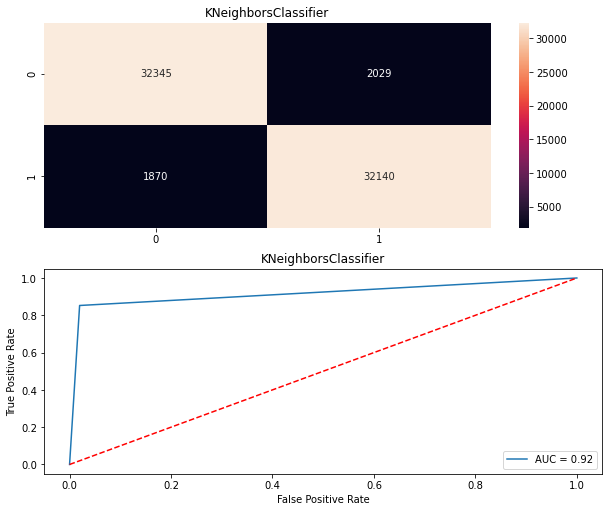

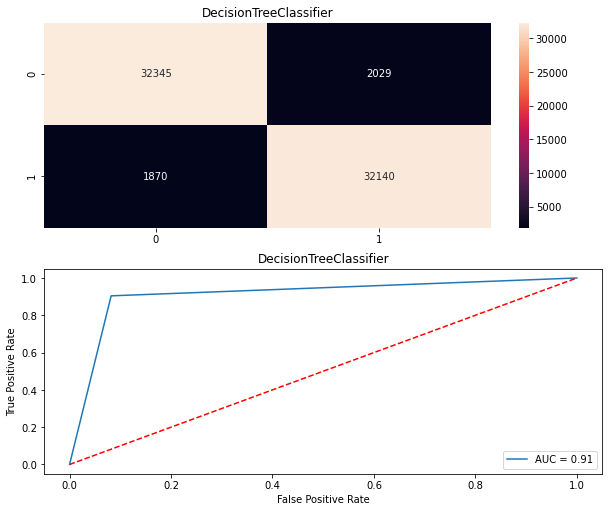

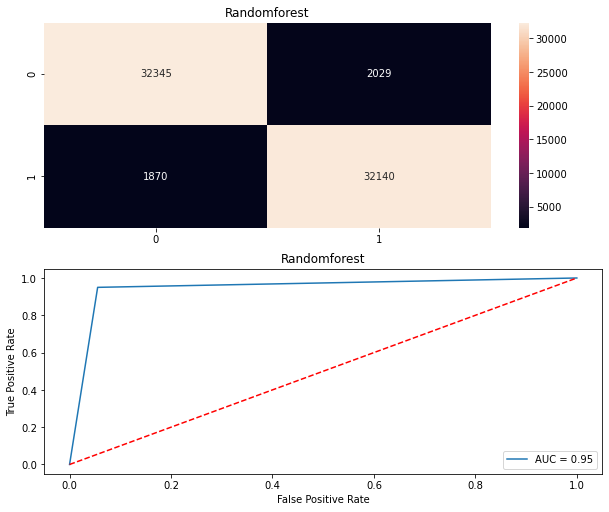

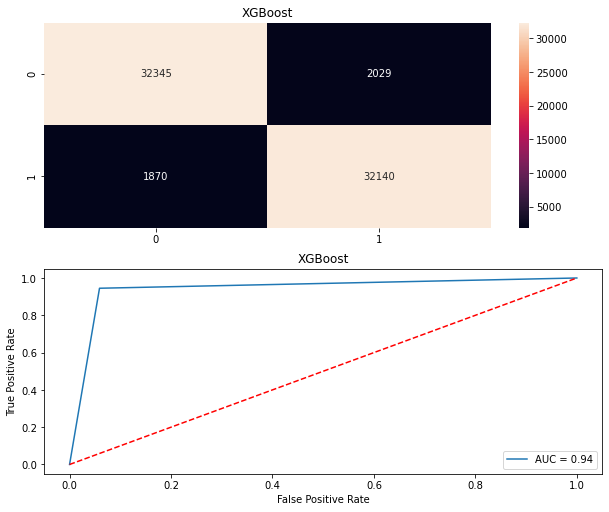

In [96]:
Model = []
score = []
cvs=[]
rocscore=[]
for name, model in models:
    print('*******************', name, '*******************\n') 
    Model.append(name)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    acc_score = accuracy_score(y_test, pred)
    print(f"Accuracy_Score  =  {acc_score*100:.2f}%")
    score.append(acc_score * 100)
    
    cross_val = cross_val_score(model, X_res, y_res, cv=10, scoring='accuracy').mean()
    print(f"Cross_Val_Score  =  {cross_val*100:.2f}%")
    cvs.append(cross_val * 100)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print(f"roc_auc_score  =  {roc_auc*100:.2f}%")
    rocscore.append(roc_auc * 100)
    
    print('\n Classification_report \n', classification_report(y_test, pred))
    print('\n')
    print('Confusion Matrix \n\n',confusion_matrix(y_test, pred))
    print('\n')  
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,fmt='d',annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [97]:
final_result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
final_result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,91.670566,92.493491,91.636594
1,DecisionTreeClassifier,91.120730,91.275766,91.117069
2,Randomforest,94.722450,94.763425,94.723834
3,XGBoost,94.298374,93.929907,94.299450


Here we can see that RandomForestClassifier is giving highest accuracy and ROC AUC value.